In [1]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')
p_ac.pl_function = p_ac.pl_wifi
ca_ac = CapacityAnalysis(p_ac)

p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')
ca_ad = CapacityAnalysis(p_ad)


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c = 60
ca_ad_gal = CapacityAnalysis(p_ad_gal)



p_ac_rural = Params()
p_ac_rural.set_radio(type='802.11ac')
p_ac_rural.pl_function = p_ac_rural.pl_wifi_rural
ca_ac_rural = CapacityAnalysis(p_ac_rural)



p_ac_fs = Params()
p_ac_fs.set_radio(type='802.11ac')
p_ac_fs.pl_function = p_ac_fs.pl_fs
ca_ac_fs = CapacityAnalysis(p_ac_fs)


dists = np.array(range(0,20000, 1000)) 
speeds_11ac = np.zeros_like(dists)
speeds_11ad = np.zeros_like(dists)
speeds_11ad_gal = np.zeros_like(dists)
speeds_11ac_rural = np.zeros_like(dists)
speeds_11ac_fs = np.zeros_like(dists)


for i,d in enumerate(dists):
    speeds_11ac[i] = ca_ac.calc_capacity(d)
    speeds_11ad[i] = ca_ad.calc_capacity(d)
    speeds_11ad_gal[i] = ca_ad_gal.calc_capacity(d)
    speeds_11ac_fs[i] = ca_ac_fs.calc_capacity(d)
    speeds_11ac_rural[i] = ca_ac_rural.calc_capacity(d)

# plt.plot(dists/1000,speeds_11ac, label="11ac Suburban")
# plt.plot(dists/1000,speeds_11ad, label="11ad Rural")
# plt.plot(dists/1000,speeds_11ad_gal, label="11ad GAL")
# #plt.plot(dists/1000,speeds_11ac_fs, label="802.11ac fspl")
# #plt.plot(dists/1000,speeds_11ac_rural, label="802.11ac rural")

# plt.xlabel("Distance [km]")
# plt.ylabel("Capacity [Mbps]")
# plt.legend()
# plt.grid(alpha=0.5)
# #plt.ylim(0,500)
# plt.savefig("figures/capacity.pdf")


out = np.array([dists, speeds_11ac/1000, speeds_11ad/1000, speeds_11ad_gal/1000]).T
np.savetxt("latex_figures/capacity_distance.csv", out, delimiter = ",", header="distance, 11ac, 11ad, 11ad_gal", comments="")

/home/gabriel/git/ODCM/analysis/params.py:33: RuntimeWarning: divide by zero encountered in log10
  pl = 38+25*np.log10(d)
/home/gabriel/git/ODCM/analysis/params.py:28: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(d/1000) + 20*np.log10(self.f_c) + 92.45 + self.get_oal(self.f_c)
/home/gabriel/git/ODCM/analysis/params.py:38: RuntimeWarning: divide by zero encountered in log10
  pl = 21.8+33*np.log10(d)


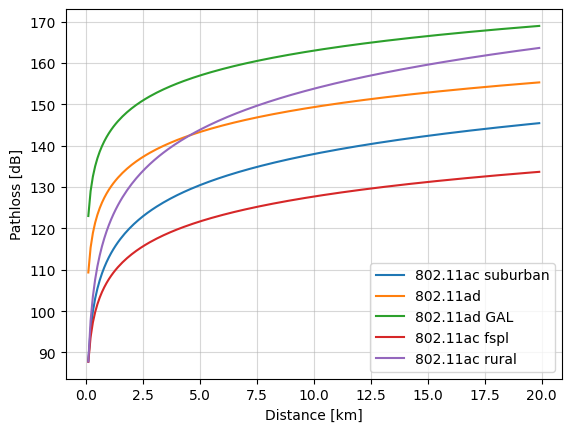

In [3]:
from capacity import CapacityAnalysis
from params import Params

p_ac = Params()
p_ac.set_radio(type='802.11ac')


p_ad = Params()
p_ad.set_radio(type='802.11ad_pro')


p_ad_gal = Params()
p_ad_gal.set_radio(type='802.11ad_pro')
p_ad_gal.f_c=60


dists = np.array(range(0,20000, 100))
pl_11ac = np.zeros_like(dists, dtype=np.float32)
pl_11ad = np.zeros_like(dists, dtype=np.float32)
pl_11ad_gal = np.zeros_like(dists, dtype=np.float32)
pl_11ac_rural = np.zeros_like(dists, dtype=np.float32)
pl_11ac_fs = np.zeros_like(dists, dtype=np.float32)



for i,d in enumerate(dists):
    pl_11ac[i] = p_ac.pl_wifi(d)
    pl_11ad[i] = p_ad.pl_fs(d)
    pl_11ad_gal[i] = p_ad_gal.pl_fs(d)
    pl_11ac_rural[i] = p_ac.pl_wifi_rural(d)
    pl_11ac_fs[i] = p_ac.pl_fs(d)


plt.plot(dists/1000,pl_11ac, label="802.11ac suburban")
plt.plot(dists/1000,pl_11ad, label="802.11ad")
plt.plot(dists/1000,pl_11ad_gal, label="802.11ad GAL")
plt.plot(dists/1000,pl_11ac_fs, label="802.11ac fspl")
plt.plot(dists/1000,pl_11ac_rural, label="802.11ac rural")

plt.xlabel("Distance [km]")
plt.ylabel("Pathloss [dB]")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("figures/pathloss.pdf")

In [2]:
bws = []
costs = []
n_ant = []
capexes = []
for dev in ['802.11ac', '802.11ad_pro']:
    bw_f = glob.glob(f'processed/{dev}/bw*.csv')
    cost_f = glob.glob(f'processed/{dev}/costs*.csv')
    n_ant_f = glob.glob(f'processed/{dev}/n_ant*.csv')
    capex_f = glob.glob(f'processed/{dev}/capex**.csv')

    for f in bw_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        bws.append(df)
    
    for f in cost_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#cluster_size": "cluster_size"}, inplace=True)
        costs.append(df)
    
    for f in n_ant_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        df.rename(columns={"#ratio": "ratio"}, inplace=True)
        n_ant.append(df)
    
    for f in capex_f:
        mgb = int(f.split('_')[-1].split('.')[0])
        df = pd.read_csv(f)
        df['mgb'] = mgb
        df['device'] = dev
        capexes.append(df)


bw_df = pd.concat(bws)
costs_df = pd.concat(costs)
n_ant_df = pd.concat(n_ant)
capex_df = pd.concat(capexes)
costs_df.set_index(['cluster_size', 'mgb', 'ratio', "device"], inplace=True)
bw_df.set_index(["cluster_size", "mgb", "ratio", "device"], inplace=True)
#Fix sum that was missing the power consumption
costs_df['correct_sum'] = costs_df.fiber_cost_mean + costs_df.transport_cost_mean + costs_df.unplanned_cost_mean  + costs_df.power_consumption_mean +costs_df.capex_mean

,level_0,index,cluster_size,mgb,ratio,device,bw_type,bw
0,0,0,50,20,25,802.11ac,max,325.398279
1,1,1,50,20,50,802.11ac,max,325.663986
2,2,2,50,20,100,802.11ac,max,324.475802
3,3,3,100,20,25,802.11ac,max,324.946709
4,4,4,100,20,50,802.11ac,max,326.383297
...,...,...,...,...,...,...,...,...
571,571,571,100,40,50,802.11ad_pro,min_ul,494.867682
572,572,572,100,40,100,802.11ad_pro,min_ul,415.961874
573,573,573,200,40,25,802.11ad_pro,min_ul,440.426817
574,574,574,200,40,50,802.11ad_pro,min_ul,412.765013


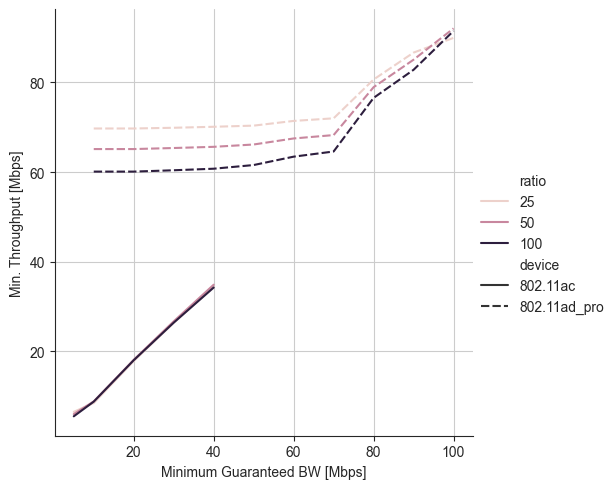

In [45]:
#bw_df = bw_df.reset_index()
toplot = bw_df[(((bw_df.cluster_size==100) & (bw_df.device=='802.11ac')) | ((bw_df.cluster_size==50) & (bw_df.device=='802.11ad_pro')) )& (bw_df.bw_type=='min') & (bw_df.mgb <=100)]
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=toplot, x='mgb', hue='ratio', kind='line', style='device', y='bw', facet_kws={'sharey': True, 'sharex': False}, errorbar=('ci', 50))

fg.set_ylabels("Min. Throughput [Mbps]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

# out = toplot.groupby(['mgb','device', "ratio"]).bw.mean().unstack(['device', 'ratio'])

# #print(out.reset_index())
# out.columns = [f"{c[0]}_{c[1]}" for c in out.columns]
# out.to_csv("latex_figures/thr_capacity.csv")


bw_df

In [25]:
bw_df = bw_df.reset_index()
toplot = bw_df[(((bw_df.cluster_size==100) & (bw_df.device=='802.11ac')) | ((bw_df.cluster_size==50) & (bw_df.device=='802.11ad_pro')) )& (bw_df.bw_type=='max') & (bw_df.mgb <=100)]
sns.set_style("ticks",{'axes.grid' : True})
# fg = sns.relplot(data=toplot, x='mgb', hue='ratio', kind='line', style='device', y='bw', facet_kws={'sharey': True, 'sharex': False})

# fg.set_ylabels("Min. Throughput [Mbps]")
# fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
# plt.savefig("/home/gabriel/git/ODCM/analysis/figures/minbw.pdf")

out = toplot.groupby(['mgb','device', "ratio"]).bw.mean().unstack(['device', 'ratio'])

#print(out.reset_index())
out.columns = [f"{c[0]}_{c[1]}" for c in out.columns]
out.to_csv("latex_figures/thr_capacity_max.csv")

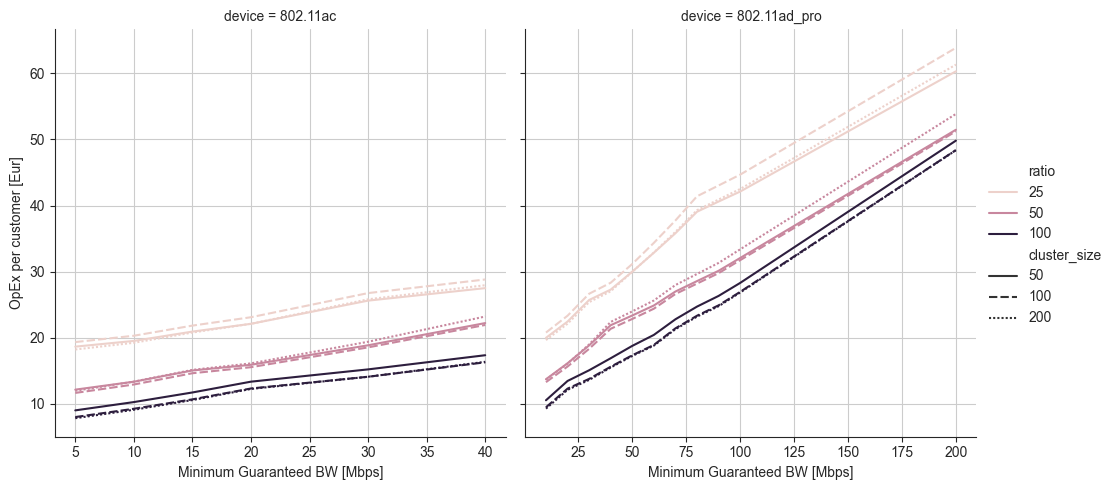

In [23]:
costs_df['opex'] = (costs_df['correct_sum']-costs_df['capex_mean']).to_frame(name="opex")

fg = sns.relplot(data=costs_df, x='mgb', hue='ratio', kind='line', col='device', y='opex', style='cluster_size',facet_kws={'sharey': True, 'sharex': False})
sns.set_style("ticks",{'axes.grid' : True})

fg.set_ylabels("OpEx per customer [Eur]")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")


plt.savefig("figures/opex.pdf")


costs_df['leo'] = (costs_df['fiber_cost_ci'] + costs_df['transport_cost_ci'] + costs_df['unplanned_cost_ci'] + costs_df['power_consumption_ci'] + costs_df['capex_ci']) /costs_df['correct_sum']



/home/gabriel/Envs/odcm/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


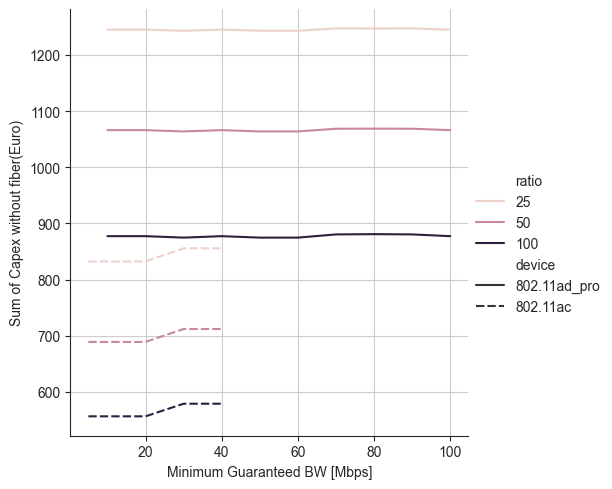

In [7]:

t_df = capex_df.set_index(['area', 'ratio', 'cluster_size', 'mgb', 'device'])
pvt = capex_df.pivot_table(index=['area', 'ratio', 'cluster_size', 'mgb', 'device'], columns='type_cost', values='5ymontlycostcustomer')
pvt['mesh_cost'] = (pvt.deploy + pvt.radio_cost + pvt.router_cost)*60

new_df = pvt.mesh_cost.reset_index()

fg = sns.relplot(data=new_df[((new_df.cluster_size==50) & (new_df.device=='802.11ad_pro') & (new_df.mgb<=100)) | (new_df.cluster_size==100) & (new_df.device=='802.11ac')], x='mgb', hue='ratio', y='mesh_cost', kind='line', style="device",facet_kws={'sharey': True, 'sharex': False}, ci=None)
fg.set_ylabels("Sum of Capex without fiber(Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/capex_nofiber.pdf")

In [8]:
capex_df

,#,nodes,n_gw,cost,algo,cost_customer,5ymontlycostcustomer,type_cost,area,ratio,cluster_size,time,seed,mgb,device
0,0,268,1,44500.000,dijkstra,126.062323,2.101039,router_cost,fauglia,25,200,17128264335,50,10,802.11ac
1,1,268,1,146600.000,dijkstra,415.297450,6.921624,deploy,fauglia,25,200,17128264335,50,10,802.11ac
2,2,268,1,53100.000,dijkstra,150.424929,2.507082,radio_cost,fauglia,25,200,17128264335,50,10,802.11ac
3,3,268,1,11709.188,dijkstra,33.170504,0.552842,fiber_cost,fauglia,25,200,17128264335,50,10,802.11ac
4,4,268,1,44500.000,dijkstra,126.062323,2.101039,router_cost,fauglia,25,200,17128264335,50,10,802.11ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53047,53047,693,1,38908.666,dijkstra,28.317806,0.471963,fiber_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro
53048,53048,693,1,231500.000,dijkstra,168.486172,2.808103,router_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro
53049,53049,693,1,603100.000,dijkstra,438.937409,7.315623,deploy,fauglia,100,50,17128287182,50,30,802.11ad_pro
53050,53050,693,1,381010.000,dijkstra,277.299854,4.621664,radio_cost,fauglia,100,50,17128287182,50,30,802.11ad_pro


In [ ]:
aggreg_capex = capex_df.groupby(['ratio', 'type_cost', 'mgb', 'device', 'cluster_size'])['cost_customer'].mean().to_frame()
aggreg_capex.reset_index(inplace=True)
aggreg_capex['ratio'] = pd.Categorical(aggreg_capex['ratio'].astype(str), [str(x) for x in sorted(aggreg_capex.ratio.unique())])


plt.rcParams['figure.figsize'] = [16, 4]

mgbs = [[5,20], [40,80]]
cs = [100,50]
for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
    for jdx, mgb in enumerate(mgbs[idx]):
        ax = plt.subplot(1,4,2*idx+jdx+1)
        ax.grid(True)
        toplot = aggreg_capex[(aggreg_capex.mgb==mgb) & (aggreg_capex.device==device) & (aggreg_capex.cluster_size==cs[idx])]
        sns.histplot(data=toplot, x='ratio', hue='type_cost', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='cost_customer', shrink=0.8, ax=ax)
        ax.set_ylabel("Total cost [€]")
        ax.set_title(f"{mgb}Mbps {device} {cs[idx]}")
        ax.set_ylabel("Capex [€/mo]")
        sns.move_legend(ax, 'lower right')

        tosave = toplot.groupby(["ratio", "type_cost"])['cost_customer'].mean().unstack("type_cost")
        tosave.to_csv(f"latex_figures/capex_{device}_{mgb}.csv")
        print(" ")
        #ax.set_ylim(0,37)

aggreg_capex.groupby(["ratio", "type_cost", "device", "mgb"])['cost_customer'].mean().unstack("type_cost").to_csv(f"latex_figures/capex_all.csv")
plt.tight_layout()
plt.savefig('figures/capex_acad.pdf')


In [81]:
test = capex_df[capex_df.mgb<=80].groupby(['mgb', 'ratio', 'cluster_size', 'device', 'type_cost']).cost.mean().unstack("type_cost")
test['sum'] = test['deploy'] + test['fiber_cost'] + test['radio_cost'] + test['router_cost']
test.iloc[test['sum'].argmax()]

type_cost
deploy         5.356682e+05
fiber_cost     5.756877e+04
radio_cost     3.449083e+05
router_cost    1.964666e+05
sum            1.134612e+06
Name: (80, 100, 50, 802.11ad_pro), dtype: float64

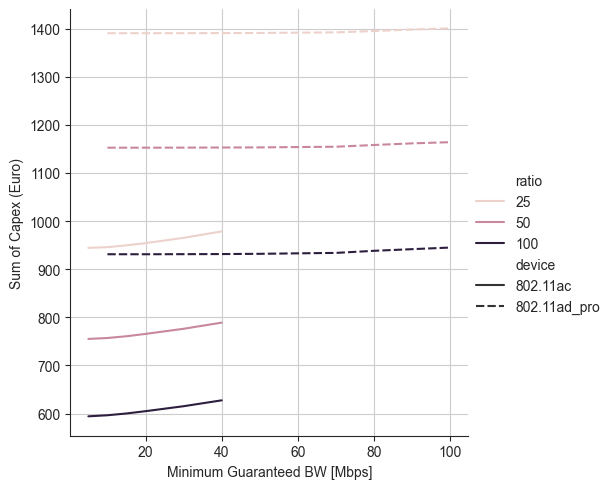

In [10]:
#sns.set_style("ticks",{'axes.grid' : True
costs_df.reset_index(inplace=True)
costs_df['capex_mean_subs'] = costs_df.capex_mean*60
fg = sns.relplot(data=costs_df[((costs_df.cluster_size==50) & (costs_df.device=='802.11ad_pro') & (costs_df.mgb<=100)) | (costs_df.cluster_size==100) & (costs_df.device=='802.11ac')], x='mgb', hue='ratio', y='capex_mean_subs', kind='line', style="device",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum of Capex (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/capex.pdf")

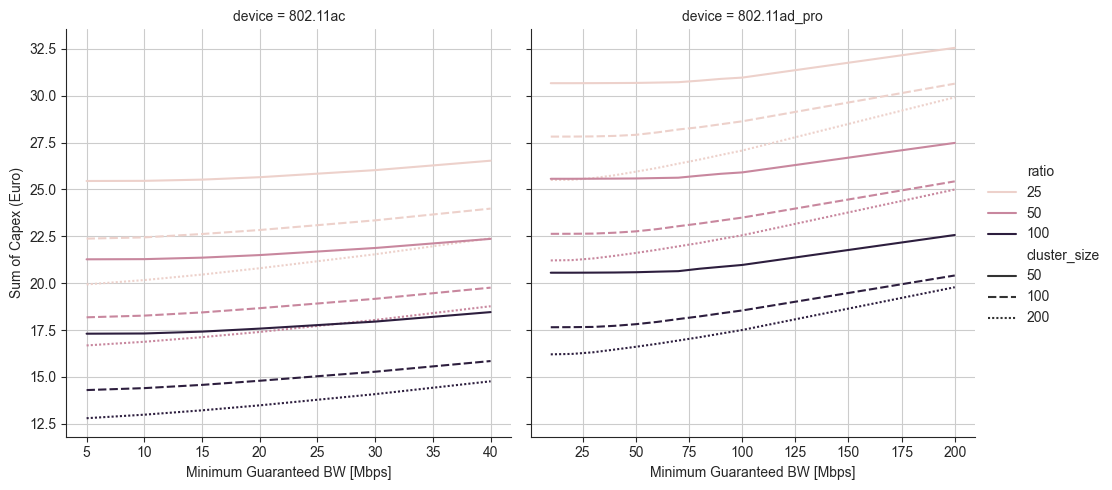

In [11]:
#sns.set_style("ticks",{'axes.grid' : True
costs_df['nofiber'] = (costs_df['correct_sum']-costs_df['fiber_cost_mean']-costs_df['transport_cost_mean']).to_frame(name="opex")

costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=50)], x='mgb', hue='ratio', y='nofiber', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum of Capex (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/costs_nofiber.pdf")

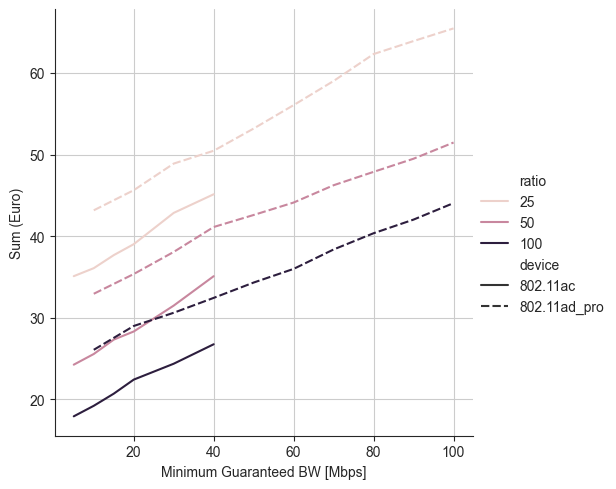

In [12]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[((costs_df.cluster_size==50) & (costs_df.device=='802.11ad_pro') & (costs_df.mgb<=100)) | (costs_df.cluster_size==100) & (costs_df.device=='802.11ac')], x='mgb', hue='ratio', y='correct_sum', kind='line', style="device",facet_kws={'sharey': True, 'sharex': False})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("figures/costs_adac_trend.pdf")

tosave = (costs_df[((costs_df.cluster_size==50) & (costs_df.device=='802.11ad_pro') & (costs_df.mgb<=100)) | (costs_df.cluster_size==100) & (costs_df.device=='802.11ac')].groupby(["mgb", "ratio", "device"]).correct_sum.mean().unstack(["ratio", "device"]))

tosave.columns = [f"{c[0]}_{c[1]}" for c in tosave.columns]

tosave.to_csv("latex_figures/mgb_trend.csv")

# fg = sns.relplot(data=costs_df[], x='mgb', hue='ratio', y='correct_sum', kind='line', col='device',style="cluster_size",facet_kws={'sharey': True, 'sharex': False})

# fg.set_ylabels("Sum (Euro)")
# fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
# plt.savefig("figures/costs_ac.pdf")

In [13]:
costs_df

,index,cluster_size,mgb,ratio,device,fiber_cost_mean,fiber_cost_ci,transport_cost_mean,transport_cost_ci,unplanned_cost_mean,...,capex_mean,capex_ci,capex_sat_mean,capex_sat_ci,recurring,sum,correct_sum,opex,capex_mean_subs,nofiber
0,0,50,30,25,802.11ac,4.905921,0.057350,13.315624,0.427628,1.521397,...,18.629716,0.236932,16.153803,0.142072,19.742942,38.372658,44.252354,25.622639,1117.782936,26.030810
1,1,50,30,50,802.11ac,4.679679,0.037043,7.814568,0.323284,1.286172,...,15.503648,0.152308,14.016544,0.109515,13.780419,29.284067,34.372482,18.868834,930.218871,21.878236
2,2,50,30,100,802.11ac,4.642807,0.048133,5.405731,0.306170,1.019503,...,12.776719,0.113130,11.816745,0.099859,11.068041,23.844760,28.000984,15.224265,766.603154,17.952447
3,3,100,30,25,802.11ac,5.184695,0.085964,14.311969,0.542339,1.550645,...,16.085554,0.230806,14.140472,0.129218,21.047309,37.132863,42.849620,26.764066,965.133259,23.352957
4,4,100,30,50,802.11ac,4.654472,0.046220,7.668234,0.337882,1.340244,...,12.936984,0.150711,11.751670,0.115436,13.662949,26.599933,31.489571,18.552587,776.219022,19.166865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,100,40,50,802.11ad_pro,6.170537,0.054933,9.160530,0.483075,1.296020,...,16.658200,0.180033,15.472886,0.149330,16.627087,33.285287,38.023645,21.365445,999.492009,22.692578
149,149,100,40,100,802.11ad_pro,6.050305,0.035679,4.854979,0.209519,0.990904,...,13.004356,0.137976,12.285178,0.124222,11.896188,24.900544,28.631610,15.627253,780.261373,17.726326
150,150,200,40,25,802.11ad_pro,6.509293,0.099897,13.400680,0.473633,1.614121,...,18.629397,0.187936,17.432314,0.157984,21.524094,40.153491,45.667313,27.037916,1117.763827,25.757339
151,151,200,40,50,802.11ad_pro,6.496719,0.089050,9.978443,0.589226,1.285879,...,15.527523,0.167368,14.584207,0.136920,17.761041,33.288564,37.933953,22.406431,931.651354,21.458791


/tmp/ipykernel_2304840/2114179717.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_2304840/2114179717.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
/tmp/ipykernel_2304840/2114179717.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

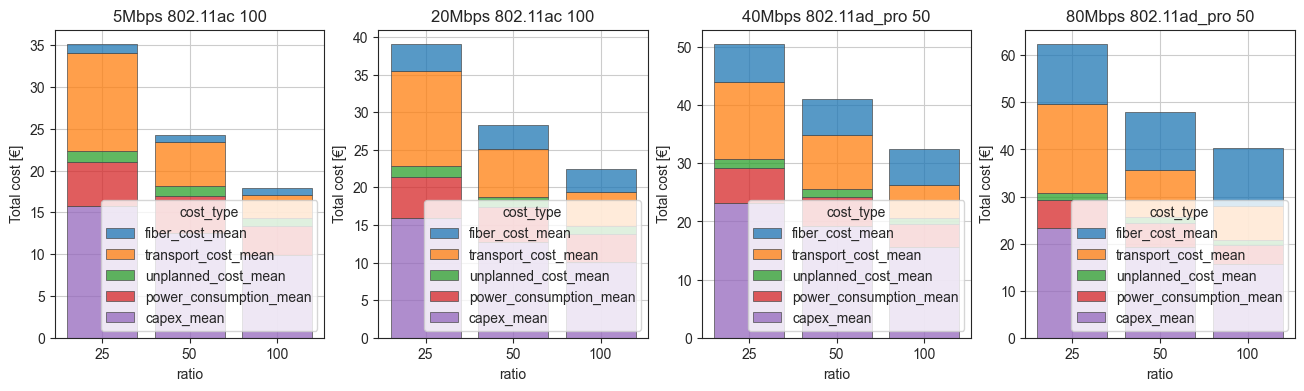

In [14]:
rotated_df = costs_df[['fiber_cost_mean', 'transport_cost_mean', 'unplanned_cost_mean', 'power_consumption_mean', 'capex_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

plt.rcParams['figure.figsize'] = [16, 4]
mgbs = [[5,20], [40,80]]
cs = [100,50]
for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
    for jdx, mgb in enumerate(mgbs[idx]):
        ax = plt.subplot(1,4,2*idx+jdx+1)
        ax.grid(True)
        toplot = rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])]
        sns.histplot(data=toplot, x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8, ax=ax)
        ax.set_ylabel("Total cost [€]")
        ax.set_title(f"{mgb}Mbps {device} {cs[idx]}")
        ax.set_ylabel("Total cost [€]")
        sns.move_legend(ax, 'lower right')

        tosave = toplot.groupby(["ratio", "cost_type"])['value'].mean().unstack("cost_type")
        tosave.to_csv(f"latex_figures/costs_{device}_{mgb}.csv")

        #ax.set_ylim(0,37)

plt.savefig('figures/costs_acad.pdf')


802.11ac 5
802.11ac 20
802.11ad_pro 40


/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is 

802.11ad_pro 80


/tmp/ipykernel_2304840/228349146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))


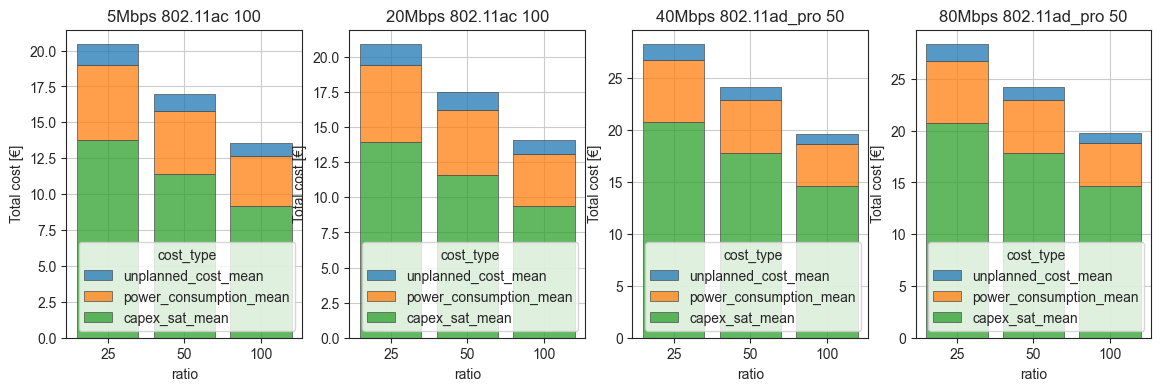

In [15]:
rotated_df = costs_df[['unplanned_cost_mean', 'power_consumption_mean', 'capex_sat_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['ratio'] = pd.Categorical(rotated_df['ratio'].astype(str), [str(x) for x in sorted(rotated_df.ratio.unique())])

plt.rcParams['figure.figsize'] = [14, 4]

mgbs = [[5,20], [40,80]]
cs = [100,50]
for idx, device in enumerate(['802.11ac', '802.11ad_pro']):
    for jdx, mgb in enumerate(mgbs[idx]):
        ax = plt.subplot(1,4,2*idx+jdx+1)
        ax.grid(True)
        sns.histplot(data=rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])], x='ratio', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value', shrink=0.8, ax=ax)
        ax.set_ylabel("Total cost [€]")
        ax.set_title(f"{mgb}Mbps {device} {cs[idx]}")
        ax.set_ylabel("Total cost [€]")
        sns.move_legend(ax, 'lower right')
        print(device,mgb)
        tosave = (rotated_df[(rotated_df.mgb==mgb) & (rotated_df.device==device) & (rotated_df.cluster_size==cs[idx])].groupby(['ratio', 'cost_type']).value.mean().unstack("cost_type"))
        tosave["sum"] = tosave.capex_sat_mean + tosave.power_consumption_mean + tosave.unplanned_cost_mean 
        tosave.to_csv(f"latex_figures/costs_nofiber_{device}_{mgb}.csv")


plt.savefig('figures/costs_acad_nofiber.pdf')


['fiber_cost_mean' 'transport_cost_mean' 'unplanned_cost_mean'
 'power_consumption_mean' 'capex_mean']


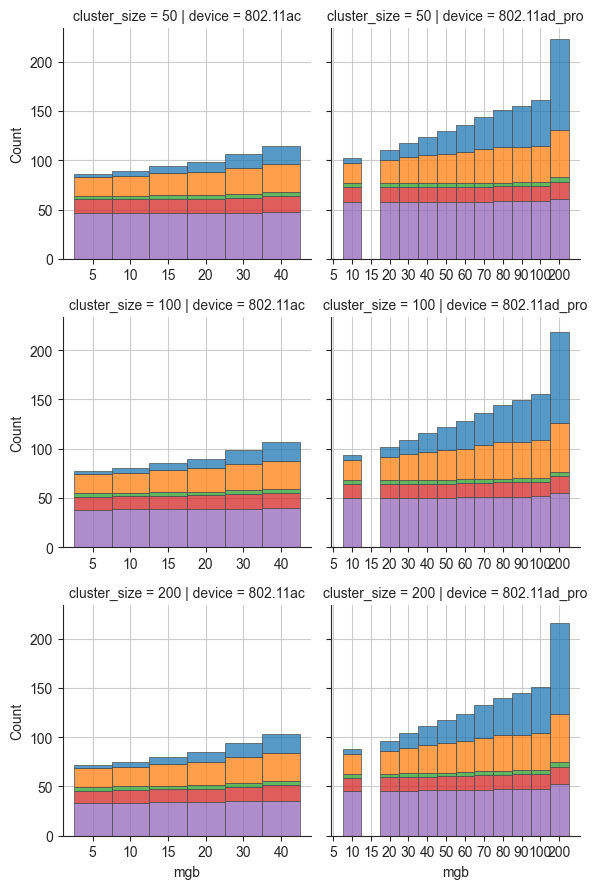

In [16]:
rotated_df = costs_df[['fiber_cost_mean', 'transport_cost_mean', 'unplanned_cost_mean', 'power_consumption_mean', 'capex_mean', 'mgb', 'cluster_size', 'device', 'ratio']].melt(id_vars=['mgb','cluster_size', 'device', 'ratio'], var_name='cost_type')

rotated_df['mgb'] = pd.Categorical(rotated_df['mgb'].astype(str), [str(x) for x in sorted(rotated_df.mgb.unique())])
print(rotated_df.cost_type.unique())
fg = sns.FacetGrid(data=rotated_df, row='cluster_size', col='device', sharex=False)
fg.map_dataframe(sns.histplot, x='mgb', hue='cost_type', multiple="stack", edgecolor=".3", linewidth=.5, discrete=True, weights='value')

p = plt.xticks(rotated_df.mgb.unique())

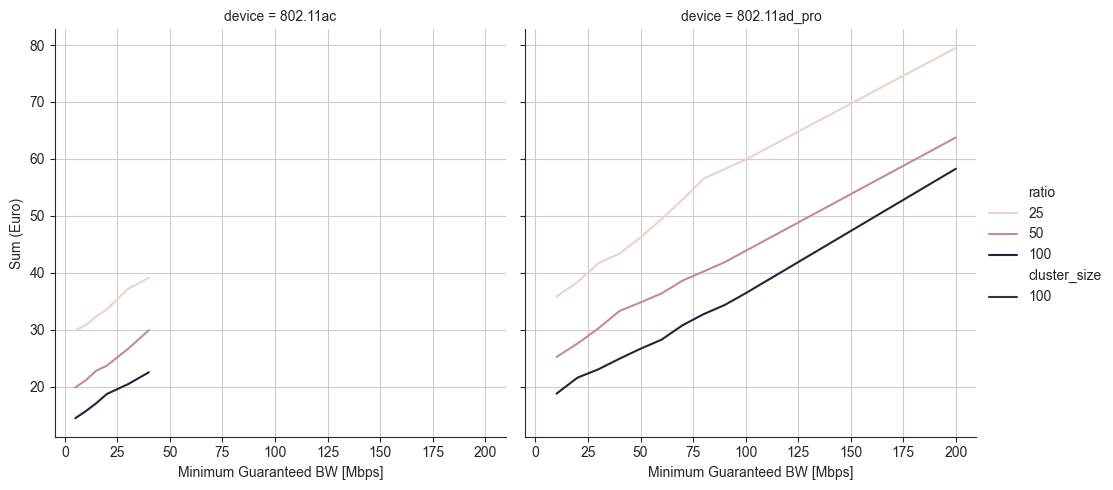

In [17]:
sns.set_style("ticks",{'axes.grid' : True})
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size==100)], x='mgb', col='device', hue='ratio', y='sum', kind='line',style="cluster_size",facet_kws={'sharey': True, 'sharex': True})

fg.set_ylabels("Sum (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/costs.pdf")

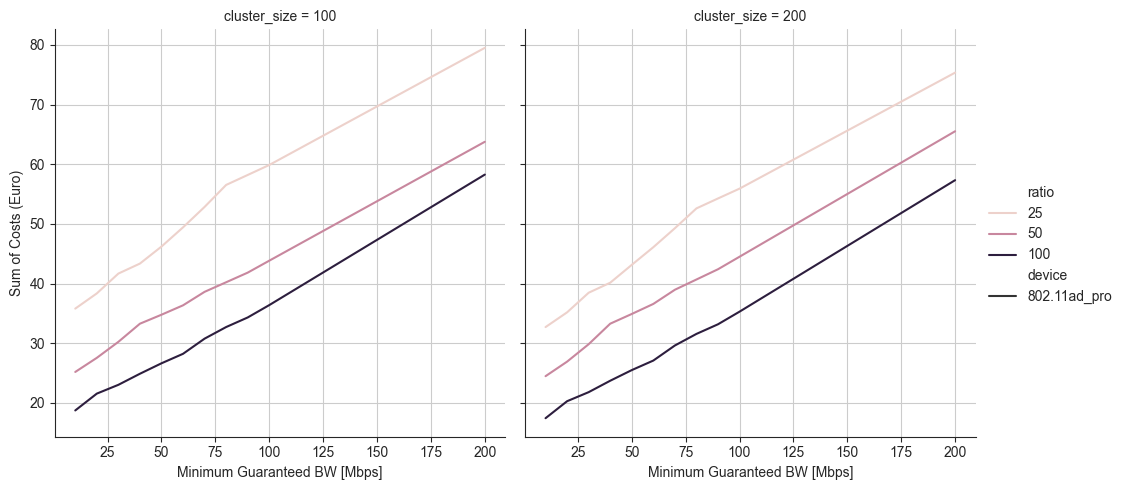

In [18]:
#sns.set_style("ticks",{'axes.grid' : True
#costs_df.reset_index(inplace=True)
fg = sns.relplot(data=costs_df[(costs_df.cluster_size>=100) & (costs_df.device=='802.11ad_pro')], x='mgb', hue='ratio', y='sum', kind='line', style='device',col="cluster_size")
fg.set_ylabels("Sum of Costs (Euro)")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")



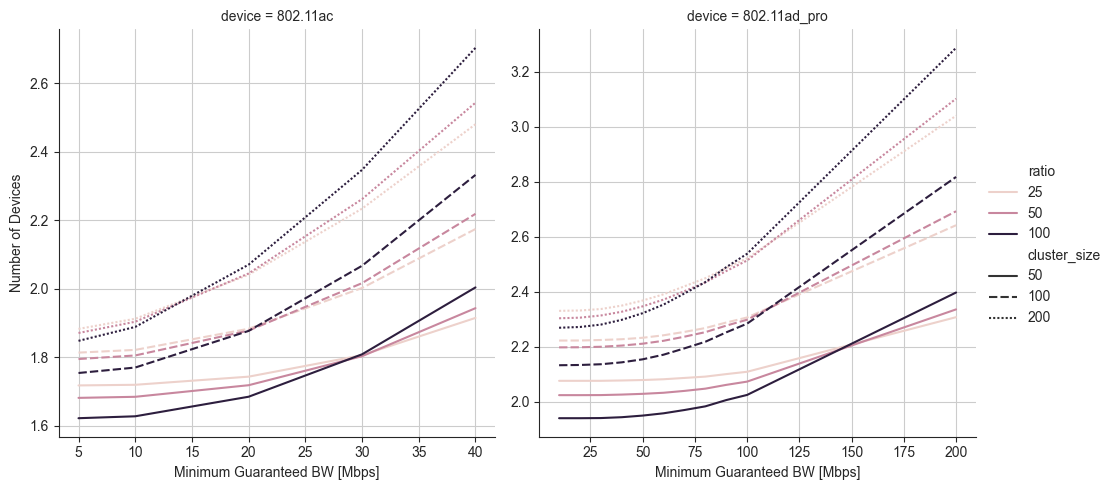

In [19]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[n_ant_df.type=='relay'], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")

# axes = fg.axes.flatten()
# axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
# axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_relay.pdf")


802.11ac
802.11ad_pro


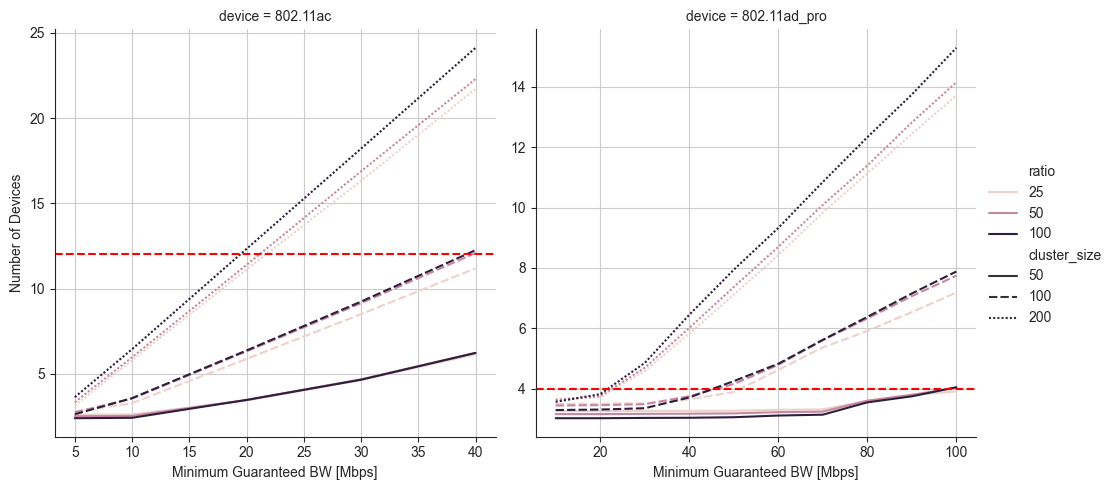

In [20]:
sns.set_style("ticks",{'axes.grid' : True})
fg = sns.relplot(data=n_ant_df[(n_ant_df.type=='gw') & (n_ant_df.mgb<=100)], x='mgb', hue='ratio', kind='line', style='cluster_size', y='antennae', col='device', facet_kws={'sharey': False, 'sharex': False})
fg.set_ylabels("Number of Devices")
fg.set_xlabels("Minimum Guaranteed BW [Mbps]")
axes = fg.axes.flatten()
axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
#axes[0].set_ylim(1,25)

axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")
#axes[1].set_ylim(1,16)


#plt.axhline(y=7, c='red', linestyle='dashed', label="horizontal")
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/n_ant_gw.pdf")

n_ant_df.reset_index()
for d in ['802.11ac', '802.11ad_pro']:
    print(d)
    tosave = n_ant_df[(n_ant_df.type=='gw') & (n_ant_df.mgb<=100) & (n_ant_df.device==d)].groupby(["mgb", "ratio", "cluster_size"]).antennae.mean().unstack(["ratio", "cluster_size"])
    tosave.columns = [f"ratio{c[0]}_cs{c[1]}" for c in tosave.columns]
    tosave.to_csv(f"latex_figures/mgb_{d}.csv")



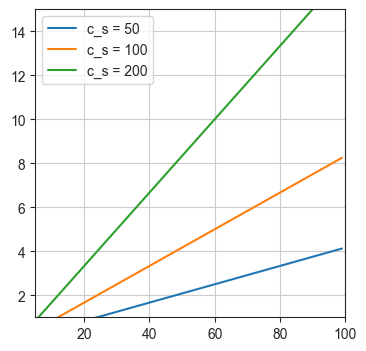

In [21]:
plt.figure(figsize=(4,4))

def get_ant(n_subs, n_gw, mgb):
    return n_subs*mgb/(n_gw*1200)

x = np.arange(0,100)

for c_s in [50,100,200]:
    y=get_ant(813,813/c_s , x)
    plt.plot(x,y, label=f"c_s = {c_s}")
    plt.xlim(5,100)
    plt.ylim(1,15)

plt.legend()

In [22]:
n_ant_df

,type,cluster_size,ratio,antennae,mgb,device
0,gw,50,25,2.611502,10,802.11ac
1,gw,50,50,2.525239,10,802.11ac
2,gw,50,100,2.415332,10,802.11ac
3,gw,100,25,3.275069,10,802.11ac
4,gw,100,50,3.541687,10,802.11ac
...,...,...,...,...,...,...
22,relay,100,50,2.204427,40,802.11ad_pro
23,relay,100,100,2.143472,40,802.11ad_pro
24,relay,200,25,2.349813,40,802.11ad_pro
25,relay,200,50,2.327519,40,802.11ad_pro


<Figure size 400x400 with 0 Axes>

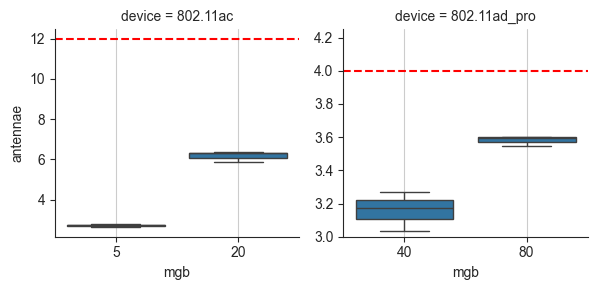

In [23]:
#We don't like this plot
plt.figure(figsize=(4,4))
n_ant_df_local = n_ant_df[(n_ant_df.type=='gw') & ((((n_ant_df.mgb == 5) | (n_ant_df.mgb == 20)) & (n_ant_df.device=='802.11ac') & (n_ant_df.cluster_size==100)) | (((n_ant_df.mgb==40) | (n_ant_df.mgb==80)) & (n_ant_df.device=='802.11ad_pro') & (n_ant_df.cluster_size==50)))]

fg= sns.FacetGrid(data=n_ant_df_local, col='device', sharey=False, sharex=False)
fg.map_dataframe(sns.boxplot, x='mgb', y='antennae')
axes = fg.axes.flatten()
axes[0].grid()
#axes[0].set_ylim(0,12.1)
axes[1].grid()
axes[0].axhline(y=12, c='red', linestyle='dashed', label="horizontal")
#axes[0].set_ylim(1,25)

axes[1].axhline(y=4, c='red', linestyle='dashed', label="horizontal")
axes[1].set_ylim(3,4.25)
#axes[1].set_ylim(1,16)
plt.savefig("/home/gabriel/git/ODCM/analysis/figures/ant_boxplot.pdf")


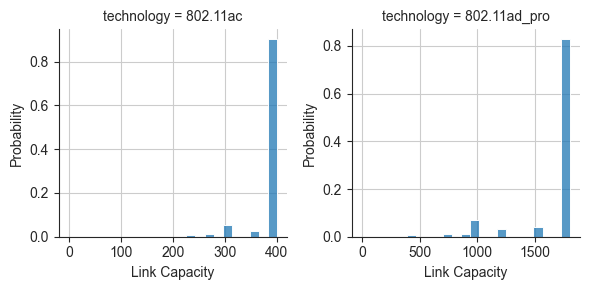

In [82]:

dfs = []
for dev in ['802.11ac', '802.11ad_pro']:
    df = pd.read_csv(f'processed/{dev}/lc.csv', names=['id', 'cap']).set_index('id')
    df['technology'] = dev
    df['Link Capacity'] = df.cap
    dfs.append(df)
df = pd.concat(dfs)

fg = sns.FacetGrid(df, col='technology', sharex=False, sharey=False)
fg.map_dataframe(sns.histplot, x='Link Capacity', stat='probability', common_norm=True)
plt.savefig('/home/gabriel/git/ODCM/analysis/figures/link_capacity_hist.pdf')

In [96]:
t = '802.11ac'
m = df[(df.technology==t)]['Link Capacity'].max()
len(df[(df.technology==t)&(df['Link Capacity'] == m)])/len(df[(df.technology==t)])

0.9026325610066833